In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

## 데이터 로드

In [2]:
! wget https://web.eecs.umich.edu/~mihalcea/downloads/MELD.Raw.tar.gz

--2023-12-02 02:17:24--  https://web.eecs.umich.edu/~mihalcea/downloads/MELD.Raw.tar.gz
Resolving web.eecs.umich.edu (web.eecs.umich.edu)... 141.212.113.214
Connecting to web.eecs.umich.edu (web.eecs.umich.edu)|141.212.113.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10878146150 (10G) [application/x-gzip]
Saving to: ‘MELD.Raw.tar.gz’

MELD.Raw.tar.gz     100%[===================>]  10.13G  17.4MB/s    in 10m 4s  

2023-12-02 02:27:29 (17.2 MB/s) - ‘MELD.Raw.tar.gz’ saved [10878146150/10878146150]



In [3]:
! tar -zxvf /content/MELD.Raw.tar.gz

MELD.Raw/
MELD.Raw/train.tar.gz
MELD.Raw/dev.tar.gz
MELD.Raw/test_sent_emo.csv
MELD.Raw/._train_splits
MELD.Raw/dev_sent_emo.csv
MELD.Raw/README.txt
MELD.Raw/test.tar.gz


In [4]:
! tar -zxvf /content/MELD.Raw/dev.tar.gz

dev_splits_complete/dia97_utt3.mp4
dev_splits_complete/dia32_utt4.mp4
dev_splits_complete/dia18_utt8.mp4
dev_splits_complete/dia30_utt18.mp4
dev_splits_complete/dia13_utt10.mp4
dev_splits_complete/dia27_utt7.mp4
dev_splits_complete/dia32_utt13.mp4
dev_splits_complete/dia4_utt14.mp4
dev_splits_complete/dia47_utt2.mp4
dev_splits_complete/dia9_utt7.mp4
dev_splits_complete/dia56_utt10.mp4
dev_splits_complete/dia10_utt5.mp4
dev_splits_complete/dia84_utt3.mp4
dev_splits_complete/dia97_utt15.mp4
dev_splits_complete/dia19_utt16.mp4
dev_splits_complete/dia30_utt0.mp4
dev_splits_complete/dia16_utt4.mp4
dev_splits_complete/dia104_utt3.mp4
dev_splits_complete/dia85_utt13.mp4
dev_splits_complete/dia25_utt3.mp4
dev_splits_complete/dia113_utt2.mp4
dev_splits_complete/dia53_utt5.mp4
dev_splits_complete/dia1_utt4.mp4
dev_splits_complete/dia7_utt3.mp4
dev_splits_complete/dia73_utt0.mp4
dev_splits_complete/dia62_utt4.mp4
dev_splits_complete/dia59_utt4.mp4
dev_splits_complete/dia90_utt6.mp4
dev_splits_com

In [5]:
! tar -zxvf /content/MELD.Raw/train.tar.gz

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
train_splits/dia6_utt17.mp4
train_splits/dia598_utt1.mp4
train_splits/dia481_utt7.mp4
train_splits/dia366_utt14.mp4
train_splits/dia295_utt8.mp4
train_splits/dia25_utt3.mp4
train_splits/dia508_utt22.mp4
train_splits/dia67_utt14.mp4
train_splits/dia37_utt2.mp4
train_splits/dia858_utt2.mp4
train_splits/dia767_utt6.mp4
train_splits/dia820_utt3.mp4
train_splits/dia901_utt14.mp4
train_splits/dia149_utt3.mp4
train_splits/dia630_utt5.mp4
train_splits/dia359_utt1.mp4
train_splits/dia722_utt3.mp4
train_splits/dia327_utt0.mp4
train_splits/dia395_utt7.mp4
train_splits/dia367_utt3.mp4
train_splits/dia828_utt4.mp4
train_splits/dia652_utt6.mp4
train_splits/dia208_utt16.mp4
train_splits/dia767_utt0.mp4
train_splits/dia720_utt7.mp4
train_splits/dia629_utt7.mp4
train_splits/dia696_utt0.mp4
train_splits/dia179_utt14.mp4
train_splits/dia521_utt0.mp4
train_splits/dia336_utt10.mp4
train_splits/dia793_utt10.mp4
train_splits/dia0_utt2.mp4
train_splits/dia717_utt8.mp4
train

In [6]:
! tar -zxvf /content/MELD.Raw/test.tar.gz

./._output_repeated_splits_test
./output_repeated_splits_test/
./output_repeated_splits_test/._dia47_utt11.mp4
./output_repeated_splits_test/dia47_utt11.mp4
./output_repeated_splits_test/._dia35_utt2.mp4
./output_repeated_splits_test/dia35_utt2.mp4
./output_repeated_splits_test/._dia47_utt9.mp4
./output_repeated_splits_test/dia47_utt9.mp4
./output_repeated_splits_test/._dia167_utt14.mp4
./output_repeated_splits_test/dia167_utt14.mp4
./output_repeated_splits_test/._dia232_utt4.mp4
./output_repeated_splits_test/dia232_utt4.mp4
./output_repeated_splits_test/._dia34_utt2.mp4
./output_repeated_splits_test/dia34_utt2.mp4
./output_repeated_splits_test/dia268_utt8.mp4
./output_repeated_splits_test/._dia233_utt4.mp4
./output_repeated_splits_test/dia233_utt4.mp4
./output_repeated_splits_test/._dia137_utt0.mp4
./output_repeated_splits_test/dia137_utt0.mp4
./output_repeated_splits_test/._dia136_utt0.mp4
./output_repeated_splits_test/dia136_utt0.mp4
./output_repeated_splits_test/._dia28_utt7.mp4
./

## 데이터셋 확인

In [8]:
train_sent_emo = pd.read_csv("/content/train_sent_emo.csv")

In [9]:
train_sent_emo.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [10]:
train_sent_emo.shape

(9989, 11)

In [11]:
#sentiment와 emotion의 차이?
train_sent_emo['Emotion'].value_counts()

neutral     4710
joy         1743
surprise    1205
anger       1109
sadness      683
disgust      271
fear         268
Name: Emotion, dtype: int64

In [12]:
train_sent_emo['Sentiment'].value_counts()

neutral     4710
negative    2945
positive    2334
Name: Sentiment, dtype: int64

성능 내려면 sentiment로 하는게 낫겠다.

In [13]:
test_sent_emo = pd.read_csv("/content/MELD.Raw/test_sent_emo.csv")
test_sent_emo.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378"
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385"
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833"


In [14]:
dev_sent_emo = pd.read_csv("/content/MELD.Raw/dev_sent_emo.csv")
dev_sent_emo.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"


### text 전처리

In [19]:
import re

def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s\n]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    text= re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"\♥\♡\ㅋ\ㅠ\ㅜ\ㄱ\ㅎ\ㄲ\ㅡ]','',text)
    text = text.lower()
    #text=text.strip('\\n')
    #text=text.strip('b/')
    #text = re.sub('\n', '.', string=text)

    return text

In [20]:
train_sent_emo['clean_Utter'] = 0

for i in range(len(train_sent_emo)):
    train_sent_emo['clean_Utter'][i] = clean_str(train_sent_emo['Utterance'][i])

train_sent_emo.head()

<ipython-input-20-d063065a75de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sent_emo['clean_Utter'][i] = clean_str(train_sent_emo['Utterance'][i])


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",also i was the point person on my companys tra...
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",you mustve had your hands full
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",that i did that i did
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",so lets talk a little bit about your duties
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",my duties all right


In [21]:
# test에 대해서도 진행

test_sent_emo['clean_Utter'] = 0

for i in range(len(test_sent_emo)):
    test_sent_emo['clean_Utter'][i] = clean_str(test_sent_emo['Utterance'][i])

test_sent_emo.head()

<ipython-input-21-7af03a5ff2bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sent_emo['clean_Utter'][i] = clean_str(test_sent_emo['Utterance'][i])


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378",why do all youre coffee mugs have numbers on t...
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385",oh thats so monica can keep track that way if ...
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520",yknow what
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146",come on lydia you can do it
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833",push


In [22]:
# dev에 대해서도 진행 -> 근데 dev는 왜 있는거지?!

dev_sent_emo['clean_Utter'] = 0

for i in range(len(dev_sent_emo)):
    dev_sent_emo['clean_Utter'][i] = clean_str(dev_sent_emo['Utterance'][i])

dev_sent_emo.head()

<ipython-input-22-8f5adf36204d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_sent_emo['clean_Utter'][i] = clean_str(dev_sent_emo['Utterance'][i])


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049",oh my god hes lost it hes totally lost it
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261",what
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915",or or we could go to the bank close our accoun...
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960",youre a genius
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505",aww man now we wont be bank buddies


이제 토큰화를 진행해보자

In [36]:
from nltk.tokenize import word_tokenize

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [38]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
train_sent_emo['utter_token'] = 0

for i in range(len(train_sent_emo)):
    train_sent_emo['utter_token'][i] = word_tokenize(train_sent_emo['clean_Utter'][i])

train_sent_emo.head()

<ipython-input-42-dccd315dcd9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sent_emo['utter_token'][i] = word_tokenize(train_sent_emo['clean_Utter'][i])


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",also i was the point person on my companys tra...,"[also, i, was, the, point, person, on, my, com..."
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",you mustve had your hands full,"[you, mustve, had, your, hands, full]"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",that i did that i did,"[that, i, did, that, i, did]"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",so lets talk a little bit about your duties,"[so, lets, talk, a, little, bit, about, your, ..."
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",my duties all right,"[my, duties, all, right]"


In [40]:
test_sent_emo['utter_token'] = 0

for i in range(len(test_sent_emo)):
    test_sent_emo['utter_token'][i] = word_tokenize(test_sent_emo['clean_Utter'][i])

test_sent_emo.head()

<ipython-input-40-9bf1b3e240d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sent_emo['utter_token'][i] = word_tokenize(test_sent_emo['clean_Utter'][i])


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378",why do all youre coffee mugs have numbers on t...,"[why, do, all, youre, coffee, mugs, have, numb..."
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385",oh thats so monica can keep track that way if ...,"[oh, thats, so, monica, can, keep, track, that..."
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520",yknow what,"[yknow, what]"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146",come on lydia you can do it,"[come, on, lydia, you, can, do, it]"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833",push,[push]


In [43]:
my_tokenizer = Tokenizer()

In [44]:
my_tokenizer.fit_on_texts(train_sent_emo['utter_token'])

In [45]:
# 정수 인코딩 진행
train_sent_emo['encoded_token'] = 0
train_sent_emo['encoded_token'] = my_tokenizer.texts_to_sequences(train_sent_emo['utter_token'])
train_sent_emo.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token,encoded_token
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",also i was the point person on my companys tra...,"[also, i, was, the, point, person, on, my, com...","[418, 2, 37, 3, 726, 419, 32, 19, 2791, 2792, ..."
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",you mustve had your hands full,"[you, mustve, had, your, hands, full]","[1, 864, 102, 42, 667, 783]"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",that i did that i did,"[that, i, did, that, i, did]","[9, 2, 76, 9, 2, 76]"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",so lets talk a little bit about your duties,"[so, lets, talk, a, little, bit, about, your, ...","[16, 148, 184, 5, 103, 453, 53, 42, 1506]"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",my duties all right,"[my, duties, all, right]","[19, 1506, 33, 38]"


In [46]:
#같은 토크나이저를 사용해서 test 셋에 대한 정수 인코딩 진행
test_sent_emo['encoded_token'] = 0
test_sent_emo['encoded_token'] = my_tokenizer.texts_to_sequences(test_sent_emo['utter_token'])
test_sent_emo.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token,encoded_token
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378",why do all youre coffee mugs have numbers on t...,"[why, do, all, youre, coffee, mugs, have, numb...","[74, 26, 33, 52, 316, 23, 1116, 32, 3, 1424]"
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385",oh thats so monica can keep track that way if ...,"[oh, thats, so, monica, can, keep, track, that...","[8, 44, 16, 120, 50, 319, 9, 152, 68, 67, 32, ..."
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520",yknow what,"[yknow, what]","[55, 10]"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146",come on lydia you can do it,"[come, on, lydia, you, can, do, it]","[71, 32, 1, 50, 26, 7]"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833",push,[push],[2232]


텍스트의 최대 길이 : 70
텍스트트의 평균 길이 : 8.009009910901993


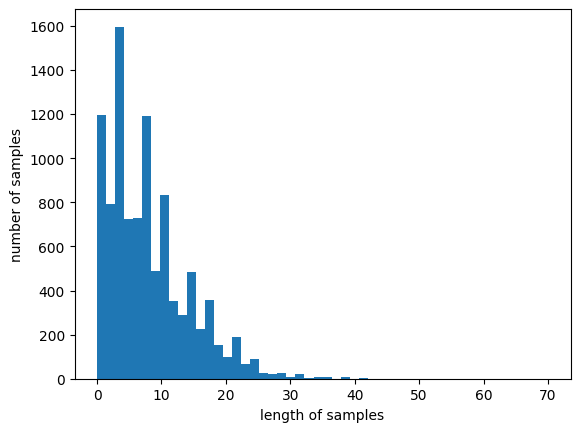

In [53]:
# 어느정도 패딩해야하는지 확인
import matplotlib.pyplot as plt
print('텍스트의 최대 길이 :',max(len(text) for text in train_sent_emo['encoded_token']))
print('텍스트트의 평균 길이 :',sum(map(len, train_sent_emo['encoded_token']))/len(train_sent_emo['encoded_token']))
plt.hist([len(text) for text in train_sent_emo['encoded_token']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

대충 40에서 끊어도 되겠는데 이전에 사용했던 코드에서 50으로 했으니까 파라미터 안헷갈리게 50으로 하겠다^^

In [74]:
#패딩하기
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [220]:
#train 셋에 대한 패딩 진행

train_sent_emo['encoded_pad'] = 0

pad = pad_sequences(train_sent_emo['encoded_token'], maxlen=50, padding='post')

for i in range(len(train_sent_emo)):
  train_sent_emo['encoded_pad'][i] = pad[i].astype(object)

train_sent_emo.head()

<ipython-input-220-b422a1797e53>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sent_emo['encoded_pad'][i] = pad[i].astype(object)


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token,encoded_token,encoded_pad,mfcc,mfcc_mean,Sentiment_y
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",also i was the point person on my companys tra...,"[also, i, was, the, point, person, on, my, com...","[418, 2, 37, 3, 726, 419, 32, 19, 2791, 2792, ...","[418, 2, 37, 3, 726, 419, 32, 19, 2791, 2792, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.7620356394908075, 0.7520514260133508, 0.73...",1
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",you mustve had your hands full,"[you, mustve, had, your, hands, full]","[1, 864, 102, 42, 667, 783]","[1, 864, 102, 42, 667, 783, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.8834609218837269, 0.8689521837345918, 0.86...",1
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",that i did that i did,"[that, i, did, that, i, did]","[9, 2, 76, 9, 2, 76]","[9, 2, 76, 9, 2, 76, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.870893349311093, 0.8486148594474108, 0.840...",1
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",so lets talk a little bit about your duties,"[so, lets, talk, a, little, bit, about, your, ...","[16, 148, 184, 5, 103, 453, 53, 42, 1506]","[16, 148, 184, 5, 103, 453, 53, 42, 1506, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.8416691346799324, 0.8198477860468577, 0.79...",1
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",my duties all right,"[my, duties, all, right]","[19, 1506, 33, 38]","[19, 1506, 33, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.8876490689190817, 0.887203884638316, 0.903...",0


In [219]:
#test셋에 대한 패딩 진행

test_sent_emo['encoded_pad'] = 0

pad = pad_sequences(test_sent_emo['encoded_token'], maxlen=50, padding='post')

for i in range(len(test_sent_emo)):
  test_sent_emo['encoded_pad'][i] = pad[i].astype(object)

test_sent_emo.head()

<ipython-input-219-ccb98487082a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sent_emo['encoded_pad'][i] = pad[i].astype(object)


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token,encoded_token,encoded_pad,mfcc,mfcc_mean,Sentiment_y
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378",why do all youre coffee mugs have numbers on t...,"[why, do, all, youre, coffee, mugs, have, numb...","[74, 26, 33, 52, 316, 23, 1116, 32, 3, 1424]","[74, 26, 33, 52, 316, 23, 1116, 32, 3, 1424, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.755013248291867, 0.7454402730856541, 0.761...",0
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385",oh thats so monica can keep track that way if ...,"[oh, thats, so, monica, can, keep, track, that...","[8, 44, 16, 120, 50, 319, 9, 152, 68, 67, 32, ...","[8, 44, 16, 120, 50, 319, 9, 152, 68, 67, 32, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.9023517765732781, 0.8951122099190383, 0.89...",2
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520",yknow what,"[yknow, what]","[55, 10]","[55, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.7804119566403357, 0.7839012820036221, 0.79...",1
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146",come on lydia you can do it,"[come, on, lydia, you, can, do, it]","[71, 32, 1, 50, 26, 7]","[71, 32, 1, 50, 26, 7, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.6863757405203675, 0.6545527306118104, 0.66...",1
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833",push,[push],[2232],"[2232, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.7454222232588179, 0.7293743920737704, 0.73...",0


dev는 어디쓰는지 모르겠어서 그냥 패스하고 나머지는 텍스트 전처리 완성!

### 음성 전처리

In [95]:
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

In [98]:
import librosa
from sklearn.preprocessing import MinMaxScaler

def extract_features(sample_path): #mfcc를 추출하는 함수
    # MFCC
    sample, sample_rate = librosa.load(sample_path)
    mfcc =librosa.feature.mfcc(y = sample, sr = 16000 ,n_mfcc=50) #음성 feature를 mfcc로 추출
    padded_mfcc = pad2d(mfcc, 600) #padding 적용
    scaler = MinMaxScaler(feature_range=(0,1)) ## 각 칼럼 데이터 값을 0~1 범위로 변환(scaling진행)

    scaler.fit(padded_mfcc) ## 각 칼럼 데이터마다 변환할 함수 생성

    scaled_padded_mfcc = scaler.transform(padded_mfcc) ## fit에서 만들어진 함수를 실제로 데이터에 적용

    result = np.array([scaled_padded_mfcc])
    return result

mp4 파일 (음원)에 대해서 mfcc (50차원)을 추출해서 넣기

In [120]:
#train set에 대해서
#train_sent_emo['mfcc'] = 0
for i in range(1166, len(train_sent_emo)):
  dia = train_sent_emo['Dialogue_ID'][i]
  utt = train_sent_emo['Utterance_ID'][i]
  tmp_path = "/content/train_splits/dia"+str(dia)+"_utt"+str(utt)+".mp4"
  print(tmp_path)
  tmp_mfcc = extract_features(tmp_path)
  train_sent_emo['mfcc'][i] = list(tmp_mfcc[0])

train_sent_emo.head()

Output hidden; open in https://colab.research.google.com to view.

In [121]:
train_sent_emo['mfcc'][1165]
#인덱스 1165는 삭제해야지.. 안됨

0

In [122]:
# 위에서 mfcc 실패한 행 삭제
train_sent_emo.drop([1165], axis=0, inplace=True)
train_sent_emo.reset_index(drop=True, inplace=True)

train_sent_emo.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token,encoded_token,encoded_pad,mfcc
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",also i was the point person on my companys tra...,"[also, i, was, the, point, person, on, my, com...","[418, 2, 37, 3, 726, 419, 32, 19, 2791, 2792, ...","[418, 2, 37, 3, 726, 419, 32, 19, 2791, 2792, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",you mustve had your hands full,"[you, mustve, had, your, hands, full]","[1, 864, 102, 42, 667, 783]","[1, 864, 102, 42, 667, 783, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",that i did that i did,"[that, i, did, that, i, did]","[9, 2, 76, 9, 2, 76]","[9, 2, 76, 9, 2, 76, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",so lets talk a little bit about your duties,"[so, lets, talk, a, little, bit, about, your, ...","[16, 148, 184, 5, 103, 453, 53, 42, 1506]","[16, 148, 184, 5, 103, 453, 53, 42, 1506, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",my duties all right,"[my, duties, all, right]","[19, 1506, 33, 38]","[19, 1506, 33, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


feature 추출 완료한 데이터셋 저장

In [ ]:
import pickle
with open('/content/drive/MyDrive/DnA_Lab/train_sent_emo.pickle', 'wb') as f:
  pickle.dump(train_sent_emo, f)

In [135]:
#test set에 대해서
test_sent_emo['mfcc'] = 0

for i in range(len(test_sent_emo)):
  dia = test_sent_emo['Dialogue_ID'][i]
  utt = test_sent_emo['Utterance_ID'][i]
  tmp_path = "/content/output_repeated_splits_test/dia"+str(dia)+"_utt"+str(utt)+".mp4"
  print(tmp_path)
  tmp_mfcc = extract_features(tmp_path)
  test_sent_emo['mfcc'][i] = list(tmp_mfcc[0])

test_sent_emo.head()

/content/output_repeated_splits_test/dia0_utt0.mp4
/content/output_repeated_splits_test/dia0_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-135-b3a2dbeaf111>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sent_emo['mfcc'][i] = list(tmp_mfcc[0])
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecate

/content/output_repeated_splits_test/dia0_utt2.mp4
/content/output_repeated_splits_test/dia1_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia1_utt1.mp4
/content/output_repeated_splits_test/dia1_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia1_utt3.mp4
/content/output_repeated_splits_test/dia1_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia1_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia1_utt6.mp4
/content/output_repeated_splits_test/dia1_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia2_utt0.mp4
/content/output_repeated_splits_test/dia2_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia2_utt2.mp4
/content/output_repeated_splits_test/dia2_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia2_utt4.mp4
/content/output_repeated_splits_test/dia2_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia2_utt6.mp4
/content/output_repeated_splits_test/dia2_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia2_utt8.mp4
/content/output_repeated_splits_test/dia2_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia2_utt10.mp4
/content/output_repeated_splits_test/dia3_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia3_utt1.mp4
/content/output_repeated_splits_test/dia3_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia3_utt3.mp4
/content/output_repeated_splits_test/dia3_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia3_utt5.mp4
/content/output_repeated_splits_test/dia3_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia4_utt0.mp4
/content/output_repeated_splits_test/dia4_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia4_utt2.mp4
/content/output_repeated_splits_test/dia4_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia4_utt4.mp4
/content/output_repeated_splits_test/dia4_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia4_utt6.mp4
/content/output_repeated_splits_test/dia4_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia4_utt8.mp4
/content/output_repeated_splits_test/dia5_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia5_utt1.mp4
/content/output_repeated_splits_test/dia5_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia5_utt3.mp4
/content/output_repeated_splits_test/dia5_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia5_utt5.mp4
/content/output_repeated_splits_test/dia5_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia5_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia5_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia6_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia6_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia6_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia7_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia7_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia7_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia7_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia7_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia7_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia7_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia7_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia7_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia8_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia8_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia8_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia8_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia8_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia8_utt5.mp4
/content/output_repeated_splits_test/dia8_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia9_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia9_utt1.mp4
/content/output_repeated_splits_test/dia9_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia9_utt3.mp4
/content/output_repeated_splits_test/dia9_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia9_utt5.mp4
/content/output_repeated_splits_test/dia9_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia9_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia9_utt8.mp4
/content/output_repeated_splits_test/dia9_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia9_utt10.mp4
/content/output_repeated_splits_test/dia9_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia9_utt12.mp4
/content/output_repeated_splits_test/dia9_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia9_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia9_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia9_utt16.mp4
/content/output_repeated_splits_test/dia9_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia10_utt0.mp4
/content/output_repeated_splits_test/dia10_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia10_utt2.mp4
/content/output_repeated_splits_test/dia10_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia11_utt0.mp4
/content/output_repeated_splits_test/dia11_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia11_utt2.mp4
/content/output_repeated_splits_test/dia11_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia11_utt4.mp4
/content/output_repeated_splits_test/dia12_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia12_utt1.mp4
/content/output_repeated_splits_test/dia12_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia12_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia12_utt4.mp4
/content/output_repeated_splits_test/dia12_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia12_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia12_utt7.mp4
/content/output_repeated_splits_test/dia12_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia12_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia12_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia12_utt11.mp4
/content/output_repeated_splits_test/dia12_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia12_utt13.mp4
/content/output_repeated_splits_test/dia12_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia12_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia12_utt16.mp4
/content/output_repeated_splits_test/dia12_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia12_utt18.mp4
/content/output_repeated_splits_test/dia12_utt19.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia13_utt0.mp4
/content/output_repeated_splits_test/dia13_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia13_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia13_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia13_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia13_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia13_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia13_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia14_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia14_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia14_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia14_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia14_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia14_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia14_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia14_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia14_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia14_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia14_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia15_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia15_utt1.mp4
/content/output_repeated_splits_test/dia15_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia15_utt3.mp4
/content/output_repeated_splits_test/dia15_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia15_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia16_utt0.mp4
/content/output_repeated_splits_test/dia16_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia16_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia16_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia16_utt4.mp4
/content/output_repeated_splits_test/dia16_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia16_utt6.mp4
/content/output_repeated_splits_test/dia16_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia16_utt8.mp4
/content/output_repeated_splits_test/dia16_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt0.mp4
/content/output_repeated_splits_test/dia17_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt3.mp4
/content/output_repeated_splits_test/dia17_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt6.mp4
/content/output_repeated_splits_test/dia17_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt9.mp4
/content/output_repeated_splits_test/dia17_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt11.mp4
/content/output_repeated_splits_test/dia17_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt14.mp4
/content/output_repeated_splits_test/dia17_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt18.mp4
/content/output_repeated_splits_test/dia17_utt19.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt20.mp4
/content/output_repeated_splits_test/dia17_utt21.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt22.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt23.mp4
/content/output_repeated_splits_test/dia17_utt24.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt25.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt26.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt27.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt28.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt29.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt30.mp4
/content/output_repeated_splits_test/dia17_utt31.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia17_utt32.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia18_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia18_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia18_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia19_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia20_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia20_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia20_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia20_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia20_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia20_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia20_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia20_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia21_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia21_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia21_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia21_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia21_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia21_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia21_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt9.mp4
/content/output_repeated_splits_test/dia22_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt11.mp4
/content/output_repeated_splits_test/dia22_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt13.mp4
/content/output_repeated_splits_test/dia22_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt16.mp4
/content/output_repeated_splits_test/dia22_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt19.mp4
/content/output_repeated_splits_test/dia22_utt20.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia22_utt21.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia23_utt0.mp4
/content/output_repeated_splits_test/dia23_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia23_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia24_utt0.mp4
/content/output_repeated_splits_test/dia24_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia24_utt2.mp4
/content/output_repeated_splits_test/dia24_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt0.mp4
/content/output_repeated_splits_test/dia25_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt2.mp4
/content/output_repeated_splits_test/dia25_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia25_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia26_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia27_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia27_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt12.mp4
/content/output_repeated_splits_test/dia28_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia28_utt15.mp4
/content/output_repeated_splits_test/dia28_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia29_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia30_utt0.mp4
/content/output_repeated_splits_test/dia30_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia30_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia30_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia30_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia30_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia31_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia32_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia33_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia33_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia33_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia33_utt3.mp4
/content/output_repeated_splits_test/dia33_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia33_utt5.mp4
/content/output_repeated_splits_test/dia33_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia33_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia33_utt8.mp4
/content/output_repeated_splits_test/dia33_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia33_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt0.mp4
/content/output_repeated_splits_test/dia34_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia34_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia35_utt0.mp4
/content/output_repeated_splits_test/dia35_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia35_utt2.mp4
/content/output_repeated_splits_test/dia35_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia35_utt4.mp4
/content/output_repeated_splits_test/dia36_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia36_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia37_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia37_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia37_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia37_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia37_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia37_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia37_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia37_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia38_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia38_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia38_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia38_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia38_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia39_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia39_utt1.mp4
/content/output_repeated_splits_test/dia39_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia39_utt3.mp4
/content/output_repeated_splits_test/dia39_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia39_utt5.mp4
/content/output_repeated_splits_test/dia39_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia39_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia39_utt8.mp4
/content/output_repeated_splits_test/dia39_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia39_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia39_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia40_utt0.mp4
/content/output_repeated_splits_test/dia40_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia41_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia41_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia41_utt2.mp4
/content/output_repeated_splits_test/dia41_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia41_utt4.mp4
/content/output_repeated_splits_test/dia41_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia41_utt6.mp4
/content/output_repeated_splits_test/dia41_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia41_utt8.mp4
/content/output_repeated_splits_test/dia41_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia41_utt10.mp4
/content/output_repeated_splits_test/dia41_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia41_utt12.mp4
/content/output_repeated_splits_test/dia42_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia42_utt1.mp4
/content/output_repeated_splits_test/dia42_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia42_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia42_utt4.mp4
/content/output_repeated_splits_test/dia42_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia42_utt6.mp4
/content/output_repeated_splits_test/dia42_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia42_utt8.mp4
/content/output_repeated_splits_test/dia43_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia43_utt1.mp4
/content/output_repeated_splits_test/dia43_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia43_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia43_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia43_utt5.mp4
/content/output_repeated_splits_test/dia43_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia44_utt0.mp4
/content/output_repeated_splits_test/dia44_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia44_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia44_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia45_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia45_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia45_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia45_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia45_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia45_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia45_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia45_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia45_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia46_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia46_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia46_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia46_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia46_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia46_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia46_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia46_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia46_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia47_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia47_utt1.mp4
/content/output_repeated_splits_test/dia47_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia47_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia47_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia47_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia47_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia47_utt7.mp4
/content/output_repeated_splits_test/dia47_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia47_utt9.mp4
/content/output_repeated_splits_test/dia47_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia47_utt11.mp4
/content/output_repeated_splits_test/dia47_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia47_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia48_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia48_utt1.mp4
/content/output_repeated_splits_test/dia48_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia48_utt3.mp4
/content/output_repeated_splits_test/dia48_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia48_utt5.mp4
/content/output_repeated_splits_test/dia48_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia49_utt0.mp4
/content/output_repeated_splits_test/dia49_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia49_utt2.mp4
/content/output_repeated_splits_test/dia49_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia49_utt4.mp4
/content/output_repeated_splits_test/dia49_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia49_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia49_utt7.mp4
/content/output_repeated_splits_test/dia49_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia49_utt9.mp4
/content/output_repeated_splits_test/dia49_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia49_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia49_utt12.mp4
/content/output_repeated_splits_test/dia49_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia49_utt14.mp4
/content/output_repeated_splits_test/dia49_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia49_utt16.mp4
/content/output_repeated_splits_test/dia50_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia50_utt1.mp4
/content/output_repeated_splits_test/dia50_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia50_utt3.mp4
/content/output_repeated_splits_test/dia51_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia51_utt1.mp4
/content/output_repeated_splits_test/dia51_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia52_utt0.mp4
/content/output_repeated_splits_test/dia52_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia52_utt2.mp4
/content/output_repeated_splits_test/dia52_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia52_utt4.mp4
/content/output_repeated_splits_test/dia52_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia52_utt6.mp4
/content/output_repeated_splits_test/dia52_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia52_utt8.mp4
/content/output_repeated_splits_test/dia52_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia52_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia52_utt11.mp4
/content/output_repeated_splits_test/dia53_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia53_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia53_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia53_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia53_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia53_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia53_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia53_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia53_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia53_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia53_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia53_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia53_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia54_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia54_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia54_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia54_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia54_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia54_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia54_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia54_utt7.mp4
/content/output_repeated_splits_test/dia54_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia54_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia54_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia54_utt11.mp4
/content/output_repeated_splits_test/dia55_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia55_utt1.mp4
/content/output_repeated_splits_test/dia55_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia56_utt0.mp4
/content/output_repeated_splits_test/dia56_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia56_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia56_utt3.mp4
/content/output_repeated_splits_test/dia56_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia56_utt5.mp4
/content/output_repeated_splits_test/dia56_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia56_utt7.mp4
/content/output_repeated_splits_test/dia56_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia56_utt9.mp4
/content/output_repeated_splits_test/dia56_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia56_utt11.mp4
/content/output_repeated_splits_test/dia57_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia57_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia57_utt2.mp4
/content/output_repeated_splits_test/dia57_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia57_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia57_utt5.mp4
/content/output_repeated_splits_test/dia58_utt0.mp4

<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)



/content/output_repeated_splits_test/dia58_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia58_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia58_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia58_utt4.mp4
/content/output_repeated_splits_test/dia58_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia58_utt6.mp4
/content/output_repeated_splits_test/dia58_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia58_utt8.mp4
/content/output_repeated_splits_test/dia58_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia58_utt10.mp4
/content/output_repeated_splits_test/dia58_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia58_utt12.mp4
/content/output_repeated_splits_test/dia58_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia58_utt14.mp4
/content/output_repeated_splits_test/dia58_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia58_utt16.mp4
/content/output_repeated_splits_test/dia59_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia59_utt1.mp4
/content/output_repeated_splits_test/dia59_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia60_utt0.mp4
/content/output_repeated_splits_test/dia60_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia60_utt2.mp4
/content/output_repeated_splits_test/dia60_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia60_utt4.mp4
/content/output_repeated_splits_test/dia60_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia60_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia61_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia61_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia61_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia62_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia62_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia63_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia63_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia64_utt15.mp4
/content/output_repeated_splits_test/dia64_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia65_utt0.mp4
/content/output_repeated_splits_test/dia65_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia65_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia65_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia65_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia65_utt5.mp4
/content/output_repeated_splits_test/dia65_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia65_utt7.mp4
/content/output_repeated_splits_test/dia65_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia65_utt9.mp4
/content/output_repeated_splits_test/dia65_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia66_utt0.mp4
/content/output_repeated_splits_test/dia66_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia66_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia66_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia66_utt4.mp4
/content/output_repeated_splits_test/dia67_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia67_utt1.mp4
/content/output_repeated_splits_test/dia67_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia67_utt3.mp4
/content/output_repeated_splits_test/dia68_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia68_utt1.mp4
/content/output_repeated_splits_test/dia68_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia68_utt3.mp4
/content/output_repeated_splits_test/dia68_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia68_utt5.mp4
/content/output_repeated_splits_test/dia68_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia68_utt7.mp4
/content/output_repeated_splits_test/dia68_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia68_utt9.mp4
/content/output_repeated_splits_test/dia68_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia68_utt11.mp4
/content/output_repeated_splits_test/dia68_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia68_utt13.mp4
/content/output_repeated_splits_test/dia68_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia69_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia69_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia69_utt2.mp4
/content/output_repeated_splits_test/dia69_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia69_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia69_utt5.mp4
/content/output_repeated_splits_test/dia70_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt1.mp4
/content/output_repeated_splits_test/dia70_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt4.mp4
/content/output_repeated_splits_test/dia70_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt6.mp4
/content/output_repeated_splits_test/dia70_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt19.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt20.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt21.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia70_utt22.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia71_utt12.mp4
/content/output_repeated_splits_test/dia71_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia72_utt0.mp4
/content/output_repeated_splits_test/dia72_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia72_utt2.mp4
/content/output_repeated_splits_test/dia72_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia72_utt4.mp4
/content/output_repeated_splits_test/dia72_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia72_utt6.mp4
/content/output_repeated_splits_test/dia72_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia72_utt8.mp4
/content/output_repeated_splits_test/dia72_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia72_utt10.mp4
/content/output_repeated_splits_test/dia72_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia72_utt12.mp4
/content/output_repeated_splits_test/dia72_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia72_utt14.mp4
/content/output_repeated_splits_test/dia72_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia72_utt16.mp4
/content/output_repeated_splits_test/dia73_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia73_utt1.mp4
/content/output_repeated_splits_test/dia73_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia73_utt3.mp4
/content/output_repeated_splits_test/dia73_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia73_utt5.mp4
/content/output_repeated_splits_test/dia73_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia73_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia73_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia73_utt9.mp4
/content/output_repeated_splits_test/dia73_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia74_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia74_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia74_utt2.mp4
/content/output_repeated_splits_test/dia74_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia74_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia75_utt0.mp4
/content/output_repeated_splits_test/dia75_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia75_utt2.mp4
/content/output_repeated_splits_test/dia75_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia75_utt4.mp4
/content/output_repeated_splits_test/dia75_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt0.mp4
/content/output_repeated_splits_test/dia76_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt2.mp4
/content/output_repeated_splits_test/dia76_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt4.mp4
/content/output_repeated_splits_test/dia76_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia76_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia77_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia77_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia77_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia77_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia77_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia78_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia78_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia78_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia78_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia78_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia78_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia78_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia78_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia78_utt8.mp4
/content/output_repeated_splits_test/dia78_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia79_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia79_utt1.mp4
/content/output_repeated_splits_test/dia80_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia80_utt1.mp4
/content/output_repeated_splits_test/dia80_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia80_utt3.mp4
/content/output_repeated_splits_test/dia80_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia80_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia80_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia80_utt7.mp4
/content/output_repeated_splits_test/dia80_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia80_utt9.mp4
/content/output_repeated_splits_test/dia81_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia81_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia82_utt0.mp4
/content/output_repeated_splits_test/dia83_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia83_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia83_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia83_utt3.mp4
/content/output_repeated_splits_test/dia83_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia83_utt5.mp4
/content/output_repeated_splits_test/dia83_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia83_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia83_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia83_utt9.mp4
/content/output_repeated_splits_test/dia83_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia84_utt0.mp4
/content/output_repeated_splits_test/dia84_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia84_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia85_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia85_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia85_utt2.mp4
/content/output_repeated_splits_test/dia85_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia85_utt4.mp4
/content/output_repeated_splits_test/dia85_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia86_utt0.mp4
/content/output_repeated_splits_test/dia86_utt1.mp4

<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)



/content/output_repeated_splits_test/dia86_utt2.mp4


/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia86_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia86_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia86_utt5.mp4
/content/output_repeated_splits_test/dia86_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia86_utt7.mp4
/content/output_repeated_splits_test/dia87_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia87_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia88_utt0.mp4
/content/output_repeated_splits_test/dia88_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia88_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia88_utt3.mp4
/content/output_repeated_splits_test/dia88_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia88_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia88_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia88_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia88_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia88_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia88_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia88_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia88_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia88_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia89_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia89_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia89_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia90_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia90_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia90_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia90_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia90_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia90_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia91_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia92_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia92_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia92_utt2.mp4
/content/output_repeated_splits_test/dia92_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia92_utt4.mp4
/content/output_repeated_splits_test/dia92_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia93_utt0.mp4
/content/output_repeated_splits_test/dia93_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia93_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia93_utt3.mp4
/content/output_repeated_splits_test/dia93_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia93_utt8.mp4
/content/output_repeated_splits_test/dia93_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia93_utt10.mp4
/content/output_repeated_splits_test/dia93_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia93_utt12.mp4
/content/output_repeated_splits_test/dia93_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia93_utt14.mp4
/content/output_repeated_splits_test/dia93_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia94_utt0.mp4
/content/output_repeated_splits_test/dia94_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia94_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia95_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia95_utt1.mp4
/content/output_repeated_splits_test/dia95_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia95_utt3.mp4
/content/output_repeated_splits_test/dia95_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia95_utt5.mp4
/content/output_repeated_splits_test/dia95_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia95_utt7.mp4
/content/output_repeated_splits_test/dia95_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia95_utt9.mp4
/content/output_repeated_splits_test/dia95_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia95_utt11.mp4
/content/output_repeated_splits_test/dia95_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia95_utt13.mp4
/content/output_repeated_splits_test/dia95_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia95_utt15.mp4
/content/output_repeated_splits_test/dia95_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia95_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia95_utt18.mp4
/content/output_repeated_splits_test/dia95_utt19.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt0.mp4
/content/output_repeated_splits_test/dia96_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt4.mp4
/content/output_repeated_splits_test/dia96_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt6.mp4
/content/output_repeated_splits_test/dia96_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt8.mp4
/content/output_repeated_splits_test/dia96_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt19.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia96_utt20.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia97_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia97_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia97_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia97_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia97_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia97_utt5.mp4
/content/output_repeated_splits_test/dia97_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia97_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia97_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia97_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia97_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia97_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia98_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia98_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia98_utt2.mp4
/content/output_repeated_splits_test/dia98_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia98_utt4.mp4
/content/output_repeated_splits_test/dia98_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia98_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia98_utt7.mp4
/content/output_repeated_splits_test/dia98_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia98_utt9.mp4
/content/output_repeated_splits_test/dia98_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia98_utt11.mp4
/content/output_repeated_splits_test/dia99_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia99_utt1.mp4
/content/output_repeated_splits_test/dia99_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia99_utt3.mp4
/content/output_repeated_splits_test/dia99_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia99_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia99_utt6.mp4
/content/output_repeated_splits_test/dia99_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia99_utt8.mp4
/content/output_repeated_splits_test/dia99_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt2.mp4
/content/output_repeated_splits_test/dia100_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt8.mp4
/content/output_repeated_splits_test/dia100_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt12.mp4
/content/output_repeated_splits_test/dia100_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt14.mp4
/content/output_repeated_splits_test/dia100_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia100_utt18.mp4
/content/output_repeated_splits_test/dia100_utt19.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia101_utt0.mp4
/content/output_repeated_splits_test/dia101_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia101_utt2.mp4
/content/output_repeated_splits_test/dia101_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia102_utt0.mp4
/content/output_repeated_splits_test/dia102_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia102_utt2.mp4
/content/output_repeated_splits_test/dia102_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia102_utt4.mp4
/content/output_repeated_splits_test/dia102_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia102_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia102_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia102_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia102_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia103_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia103_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia103_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia103_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia103_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia103_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia104_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia104_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia104_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia105_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia105_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia105_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia106_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia106_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia106_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia106_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia107_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia107_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia107_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia107_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia107_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia107_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia107_utt6.mp4
/content/output_repeated_splits_test/dia107_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia107_utt8.mp4
/content/output_repeated_splits_test/dia107_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia107_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia107_utt11.mp4
/content/output_repeated_splits_test/dia107_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia108_utt0.mp4
/content/output_repeated_splits_test/dia108_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia108_utt4.mp4
/content/output_repeated_splits_test/dia108_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia108_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia108_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia108_utt8.mp4
/content/output_repeated_splits_test/dia108_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia109_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia109_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia109_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia109_utt3.mp4
/content/output_repeated_splits_test/dia109_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia109_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia109_utt6.mp4
/content/output_repeated_splits_test/dia109_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia110_utt0.mp4
/content/output_repeated_splits_test/dia110_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia110_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia110_utt3.mp4
/content/output_repeated_splits_test/dia110_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia110_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia110_utt6.mp4
/content/output_repeated_splits_test/dia110_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia110_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia111_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia111_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia111_utt2.mp4
/content/output_repeated_splits_test/dia111_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia111_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia111_utt5.mp4
/content/output_repeated_splits_test/dia111_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia111_utt7.mp4
/content/output_repeated_splits_test/dia111_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia111_utt9.mp4
/content/output_repeated_splits_test/dia111_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia111_utt11.mp4
/content/output_repeated_splits_test/dia111_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia111_utt13.mp4
/content/output_repeated_splits_test/dia111_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt19.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt20.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia112_utt21.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia113_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia113_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia113_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia113_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia113_utt4.mp4
/content/output_repeated_splits_test/dia113_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia113_utt6.mp4
/content/output_repeated_splits_test/dia113_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia113_utt8.mp4
/content/output_repeated_splits_test/dia113_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia113_utt10.mp4
/content/output_repeated_splits_test/dia113_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia113_utt12.mp4
/content/output_repeated_splits_test/dia113_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia113_utt14.mp4
/content/output_repeated_splits_test/dia113_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia113_utt16.mp4
/content/output_repeated_splits_test/dia114_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia114_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia114_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia114_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia114_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia114_utt5.mp4
/content/output_repeated_splits_test/dia115_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia115_utt1.mp4
/content/output_repeated_splits_test/dia115_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia115_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia115_utt4.mp4
/content/output_repeated_splits_test/dia115_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia116_utt0.mp4
/content/output_repeated_splits_test/dia116_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia116_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia116_utt3.mp4
/content/output_repeated_splits_test/dia116_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia116_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia116_utt6.mp4
/content/output_repeated_splits_test/dia116_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia116_utt8.mp4
/content/output_repeated_splits_test/dia116_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia116_utt10.mp4
/content/output_repeated_splits_test/dia116_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia117_utt0.mp4
/content/output_repeated_splits_test/dia117_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia117_utt2.mp4
/content/output_repeated_splits_test/dia117_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia117_utt4.mp4
/content/output_repeated_splits_test/dia117_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia117_utt6.mp4
/content/output_repeated_splits_test/dia117_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia117_utt8.mp4
/content/output_repeated_splits_test/dia118_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia118_utt1.mp4
/content/output_repeated_splits_test/dia118_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist

/content/output_repeated_splits_test/dia118_utt3.mp4
/content/output_repeated_splits_test/dia118_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia118_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia118_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia118_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia118_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia118_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia118_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia118_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia119_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia119_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia119_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia119_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia119_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia119_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia119_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt12.mp4
/content/output_repeated_splits_test/dia120_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt14.mp4
/content/output_repeated_splits_test/dia120_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia120_utt17.mp4
/content/output_repeated_splits_test/dia120_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia121_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia121_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia121_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia121_utt3.mp4
/content/output_repeated_splits_test/dia121_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia121_utt5.mp4
/content/output_repeated_splits_test/dia122_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia122_utt1.mp4
/content/output_repeated_splits_test/dia122_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia122_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia122_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia123_utt0.mp4
/content/output_repeated_splits_test/dia123_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia123_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia123_utt3.mp4
/content/output_repeated_splits_test/dia123_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia123_utt5.mp4
/content/output_repeated_splits_test/dia123_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia123_utt7.mp4
/content/output_repeated_splits_test/dia123_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia123_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia123_utt10.mp4
/content/output_repeated_splits_test/dia123_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia123_utt12.mp4
/content/output_repeated_splits_test/dia123_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia123_utt14.mp4
/content/output_repeated_splits_test/dia123_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia124_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia124_utt1.mp4
/content/output_repeated_splits_test/dia124_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia124_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia124_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia124_utt5.mp4
/content/output_repeated_splits_test/dia124_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia124_utt7.mp4
/content/output_repeated_splits_test/dia124_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia124_utt9.mp4
/content/output_repeated_splits_test/dia124_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia124_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia124_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia124_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia124_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt19.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt20.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt21.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia125_utt22.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia126_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia126_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia126_utt2.mp4
/content/output_repeated_splits_test/dia126_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia126_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia126_utt5.mp4
/content/output_repeated_splits_test/dia126_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia126_utt7.mp4
/content/output_repeated_splits_test/dia126_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia126_utt9.mp4
/content/output_repeated_splits_test/dia126_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia126_utt11.mp4
/content/output_repeated_splits_test/dia126_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia126_utt13.mp4
/content/output_repeated_splits_test/dia126_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia126_utt15.mp4
/content/output_repeated_splits_test/dia127_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia127_utt1.mp4
/content/output_repeated_splits_test/dia127_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia127_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia127_utt4.mp4
/content/output_repeated_splits_test/dia127_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia128_utt0.mp4
/content/output_repeated_splits_test/dia128_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia128_utt2.mp4
/content/output_repeated_splits_test/dia128_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia128_utt4.mp4
/content/output_repeated_splits_test/dia128_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia128_utt6.mp4
/content/output_repeated_splits_test/dia128_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia128_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia128_utt9.mp4
/content/output_repeated_splits_test/dia129_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia129_utt1.mp4
/content/output_repeated_splits_test/dia129_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia129_utt3.mp4
/content/output_repeated_splits_test/dia129_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia129_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia129_utt6.mp4
/content/output_repeated_splits_test/dia129_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia130_utt0.mp4
/content/output_repeated_splits_test/dia130_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia130_utt2.mp4
/content/output_repeated_splits_test/dia130_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia130_utt4.mp4
/content/output_repeated_splits_test/dia130_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia130_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia130_utt7.mp4
/content/output_repeated_splits_test/dia130_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia130_utt9.mp4
/content/output_repeated_splits_test/dia130_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia130_utt11.mp4
/content/output_repeated_splits_test/dia130_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia130_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia130_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia130_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia130_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia130_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia131_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia131_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia131_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia131_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia131_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia131_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia131_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia131_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia131_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt17.mp4
/content/output_repeated_splits_test/dia132_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia132_utt19.mp4
/content/output_repeated_splits_test/dia133_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia133_utt1.mp4
/content/output_repeated_splits_test/dia133_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia133_utt3.mp4
/content/output_repeated_splits_test/dia133_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia133_utt5.mp4
/content/output_repeated_splits_test/dia133_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia133_utt7.mp4
/content/output_repeated_splits_test/dia133_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia133_utt9.mp4
/content/output_repeated_splits_test/dia133_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia133_utt11.mp4
/content/output_repeated_splits_test/dia133_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia133_utt13.mp4
/content/output_repeated_splits_test/dia133_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia133_utt15.mp4
/content/output_repeated_splits_test/dia134_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia134_utt1.mp4
/content/output_repeated_splits_test/dia134_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia134_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia135_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia135_utt1.mp4
/content/output_repeated_splits_test/dia135_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia135_utt3.mp4
/content/output_repeated_splits_test/dia135_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia135_utt5.mp4
/content/output_repeated_splits_test/dia136_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia137_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia137_utt1.mp4
/content/output_repeated_splits_test/dia137_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist

/content/output_repeated_splits_test/dia137_utt3.mp4
/content/output_repeated_splits_test/dia137_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia137_utt5.mp4
/content/output_repeated_splits_test/dia137_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia137_utt7.mp4
/content/output_repeated_splits_test/dia137_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia137_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia137_utt10.mp4
/content/output_repeated_splits_test/dia137_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia137_utt12.mp4
/content/output_repeated_splits_test/dia137_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia137_utt14.mp4
/content/output_repeated_splits_test/dia138_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia138_utt1.mp4
/content/output_repeated_splits_test/dia138_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia138_utt3.mp4
/content/output_repeated_splits_test/dia139_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia139_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia139_utt2.mp4
/content/output_repeated_splits_test/dia139_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia139_utt4.mp4
/content/output_repeated_splits_test/dia139_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia139_utt6.mp4
/content/output_repeated_splits_test/dia139_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia139_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia139_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia140_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia141_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia141_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia141_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia141_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia141_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia142_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia142_utt1.mp4
/content/output_repeated_splits_test/dia143_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia143_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia143_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia143_utt3.mp4
/content/output_repeated_splits_test/dia143_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia143_utt5.mp4
/content/output_repeated_splits_test/dia143_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia143_utt7.mp4
/content/output_repeated_splits_test/dia143_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia144_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia144_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia144_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia144_utt3.mp4
/content/output_repeated_splits_test/dia144_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia144_utt5.mp4
/content/output_repeated_splits_test/dia144_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia144_utt7.mp4
/content/output_repeated_splits_test/dia144_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia144_utt9.mp4
/content/output_repeated_splits_test/dia144_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia144_utt11.mp4
/content/output_repeated_splits_test/dia144_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia144_utt13.mp4
/content/output_repeated_splits_test/dia144_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia145_utt0.mp4
/content/output_repeated_splits_test/dia145_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia145_utt2.mp4
/content/output_repeated_splits_test/dia145_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia145_utt4.mp4
/content/output_repeated_splits_test/dia145_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia145_utt6.mp4
/content/output_repeated_splits_test/dia145_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia145_utt8.mp4
/content/output_repeated_splits_test/dia145_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia145_utt10.mp4
/content/output_repeated_splits_test/dia145_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia145_utt12.mp4
/content/output_repeated_splits_test/dia146_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia146_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia146_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia146_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia146_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia146_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia146_utt6.mp4
/content/output_repeated_splits_test/dia147_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia147_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia147_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia147_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia147_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia147_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia147_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia147_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia147_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia147_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia147_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia148_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia149_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia149_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia149_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia150_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia150_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia150_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia150_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia150_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia150_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia151_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia151_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia151_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia151_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia152_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia152_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia152_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia152_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia152_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia153_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia153_utt1.mp4
/content/output_repeated_splits_test/dia153_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia153_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia153_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia153_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia153_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia153_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia153_utt8.mp4
/content/output_repeated_splits_test/dia153_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia153_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia153_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia154_utt0.mp4
/content/output_repeated_splits_test/dia154_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia154_utt2.mp4
/content/output_repeated_splits_test/dia154_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia154_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia154_utt5.mp4
/content/output_repeated_splits_test/dia154_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia154_utt7.mp4
/content/output_repeated_splits_test/dia154_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia154_utt9.mp4
/content/output_repeated_splits_test/dia154_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia154_utt11.mp4
/content/output_repeated_splits_test/dia154_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia154_utt13.mp4
/content/output_repeated_splits_test/dia154_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia154_utt15.mp4
/content/output_repeated_splits_test/dia154_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia154_utt17.mp4
/content/output_repeated_splits_test/dia154_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia154_utt19.mp4
/content/output_repeated_splits_test/dia154_utt20.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia155_utt0.mp4
/content/output_repeated_splits_test/dia155_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia155_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia155_utt3.mp4
/content/output_repeated_splits_test/dia155_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia155_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia155_utt6.mp4
/content/output_repeated_splits_test/dia155_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia155_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia156_utt0.mp4
/content/output_repeated_splits_test/dia156_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia156_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia156_utt3.mp4
/content/output_repeated_splits_test/dia156_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia156_utt5.mp4
/content/output_repeated_splits_test/dia156_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia156_utt7.mp4
/content/output_repeated_splits_test/dia156_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia156_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia156_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia156_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia156_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia156_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia156_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia156_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia157_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia157_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia157_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia157_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia157_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia157_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia157_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia157_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia158_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia158_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia158_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia158_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia158_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia158_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia158_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia159_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia159_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia160_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia160_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia160_utt2.mp4
/content/output_repeated_splits_test/dia160_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia160_utt4.mp4
/content/output_repeated_splits_test/dia160_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia160_utt6.mp4
/content/output_repeated_splits_test/dia160_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia160_utt8.mp4
/content/output_repeated_splits_test/dia160_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia160_utt10.mp4
/content/output_repeated_splits_test/dia160_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia160_utt12.mp4
/content/output_repeated_splits_test/dia160_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia161_utt0.mp4
/content/output_repeated_splits_test/dia161_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia161_utt2.mp4
/content/output_repeated_splits_test/dia161_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia161_utt4.mp4
/content/output_repeated_splits_test/dia161_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia161_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia161_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia161_utt8.mp4
/content/output_repeated_splits_test/dia161_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia161_utt10.mp4
/content/output_repeated_splits_test/dia161_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia162_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia162_utt1.mp4
/content/output_repeated_splits_test/dia162_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia162_utt3.mp4
/content/output_repeated_splits_test/dia162_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia162_utt5.mp4
/content/output_repeated_splits_test/dia163_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia163_utt1.mp4
/content/output_repeated_splits_test/dia163_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia163_utt3.mp4
/content/output_repeated_splits_test/dia163_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia163_utt5.mp4
/content/output_repeated_splits_test/dia163_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia163_utt7.mp4
/content/output_repeated_splits_test/dia163_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia163_utt9.mp4
/content/output_repeated_splits_test/dia164_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia164_utt1.mp4
/content/output_repeated_splits_test/dia164_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia164_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia164_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia164_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia164_utt6.mp4
/content/output_repeated_splits_test/dia164_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia164_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia165_utt0.mp4
/content/output_repeated_splits_test/dia165_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia165_utt2.mp4
/content/output_repeated_splits_test/dia165_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia165_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia166_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt1.mp4
/content/output_repeated_splits_test/dia167_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt12.mp4
/content/output_repeated_splits_test/dia167_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia167_utt15.mp4
/content/output_repeated_splits_test/dia167_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia168_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia168_utt1.mp4
/content/output_repeated_splits_test/dia168_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist

/content/output_repeated_splits_test/dia168_utt3.mp4
/content/output_repeated_splits_test/dia168_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia168_utt5.mp4
/content/output_repeated_splits_test/dia168_utt6.mp4
/content/output_repeated_splits_test/dia168_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia168_utt8.mp4
/content/output_repeated_splits_test/dia168_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia168_utt10.mp4
/content/output_repeated_splits_test/dia168_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia168_utt12.mp4
/content/output_repeated_splits_test/dia168_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia168_utt14.mp4
/content/output_repeated_splits_test/dia168_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia168_utt16.mp4
/content/output_repeated_splits_test/dia168_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia168_utt18.mp4
/content/output_repeated_splits_test/dia169_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia169_utt1.mp4
/content/output_repeated_splits_test/dia169_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia169_utt3.mp4
/content/output_repeated_splits_test/dia169_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia169_utt5.mp4
/content/output_repeated_splits_test/dia169_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia169_utt7.mp4
/content/output_repeated_splits_test/dia169_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia169_utt9.mp4
/content/output_repeated_splits_test/dia169_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia169_utt11.mp4
/content/output_repeated_splits_test/dia169_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia169_utt13.mp4
/content/output_repeated_splits_test/dia169_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia169_utt15.mp4
/content/output_repeated_splits_test/dia169_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia169_utt17.mp4
/content/output_repeated_splits_test/dia169_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia169_utt19.mp4
/content/output_repeated_splits_test/dia169_utt20.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia169_utt21.mp4
/content/output_repeated_splits_test/dia169_utt22.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia170_utt0.mp4
/content/output_repeated_splits_test/dia170_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia170_utt2.mp4
/content/output_repeated_splits_test/dia170_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia170_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia171_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia171_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia171_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia171_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia171_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia171_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia171_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia171_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia171_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia172_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia172_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia172_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt12.mp4
/content/output_repeated_splits_test/dia173_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt15.mp4
/content/output_repeated_splits_test/dia173_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia173_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia174_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia174_utt1.mp4
/content/output_repeated_splits_test/dia174_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia174_utt3.mp4
/content/output_repeated_splits_test/dia174_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia174_utt5.mp4
/content/output_repeated_splits_test/dia174_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia174_utt7.mp4
/content/output_repeated_splits_test/dia174_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia174_utt9.mp4
/content/output_repeated_splits_test/dia174_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia174_utt11.mp4
/content/output_repeated_splits_test/dia174_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia174_utt13.mp4
/content/output_repeated_splits_test/dia174_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia174_utt15.mp4
/content/output_repeated_splits_test/dia174_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia174_utt17.mp4
/content/output_repeated_splits_test/dia174_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt0.mp4
/content/output_repeated_splits_test/dia175_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt4.mp4
/content/output_repeated_splits_test/dia175_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt7.mp4
/content/output_repeated_splits_test/dia175_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt9.mp4
/content/output_repeated_splits_test/dia175_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt11.mp4
/content/output_repeated_splits_test/dia175_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt13.mp4
/content/output_repeated_splits_test/dia175_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt15.mp4
/content/output_repeated_splits_test/dia175_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt18.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt19.mp4
/content/output_repeated_splits_test/dia175_utt20.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt21.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia175_utt22.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia176_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia176_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia177_utt0.mp4
/content/output_repeated_splits_test/dia177_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia177_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia178_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia178_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia178_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia178_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia178_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia178_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia178_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia178_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia178_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia178_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia179_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia179_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia179_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia179_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia180_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia180_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia180_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia180_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia180_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia180_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia180_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia180_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia180_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia180_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia181_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia181_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia181_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia181_utt3.mp4
/content/output_repeated_splits_test/dia181_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia181_utt5.mp4
/content/output_repeated_splits_test/dia182_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia182_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia182_utt2.mp4
/content/output_repeated_splits_test/dia182_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia182_utt4.mp4
/content/output_repeated_splits_test/dia182_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia182_utt6.mp4
/content/output_repeated_splits_test/dia182_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia182_utt8.mp4
/content/output_repeated_splits_test/dia182_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia183_utt0.mp4
/content/output_repeated_splits_test/dia183_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia183_utt2.mp4
/content/output_repeated_splits_test/dia183_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia183_utt4.mp4
/content/output_repeated_splits_test/dia183_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia183_utt6.mp4
/content/output_repeated_splits_test/dia183_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia183_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia184_utt0.mp4
/content/output_repeated_splits_test/dia184_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia184_utt2.mp4
/content/output_repeated_splits_test/dia184_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia184_utt4.mp4
/content/output_repeated_splits_test/dia184_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia184_utt6.mp4
/content/output_repeated_splits_test/dia184_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia184_utt8.mp4
/content/output_repeated_splits_test/dia184_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia184_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia184_utt11.mp4
/content/output_repeated_splits_test/dia184_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia184_utt13.mp4
/content/output_repeated_splits_test/dia184_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia185_utt0.mp4
/content/output_repeated_splits_test/dia185_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia185_utt2.mp4
/content/output_repeated_splits_test/dia185_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia185_utt4.mp4
/content/output_repeated_splits_test/dia185_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia185_utt6.mp4
/content/output_repeated_splits_test/dia185_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia186_utt0.mp4
/content/output_repeated_splits_test/dia186_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia186_utt2.mp4
/content/output_repeated_splits_test/dia186_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia187_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia187_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia187_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia187_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia187_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia187_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia187_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia187_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia187_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia188_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia188_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia188_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia188_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia188_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia188_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia188_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia188_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia188_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia189_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia189_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia189_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia189_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia189_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia189_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia189_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia189_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia189_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia189_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia190_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia190_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia190_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia190_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia190_utt4.mp4
/content/output_repeated_splits_test/dia191_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia191_utt1.mp4
/content/output_repeated_splits_test/dia191_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia191_utt3.mp4
/content/output_repeated_splits_test/dia191_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia191_utt5.mp4
/content/output_repeated_splits_test/dia191_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia191_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia191_utt8.mp4
/content/output_repeated_splits_test/dia191_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia192_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia192_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia192_utt2.mp4
/content/output_repeated_splits_test/dia192_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia192_utt4.mp4
/content/output_repeated_splits_test/dia192_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia192_utt6.mp4
/content/output_repeated_splits_test/dia192_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia192_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia192_utt9.mp4
/content/output_repeated_splits_test/dia192_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia192_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia193_utt0.mp4
/content/output_repeated_splits_test/dia193_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia193_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia193_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia193_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia194_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia194_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia194_utt2.mp4
/content/output_repeated_splits_test/dia194_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia194_utt4.mp4
/content/output_repeated_splits_test/dia195_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia195_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia195_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia195_utt3.mp4
/content/output_repeated_splits_test/dia195_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia195_utt5.mp4
/content/output_repeated_splits_test/dia195_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia195_utt7.mp4
/content/output_repeated_splits_test/dia195_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist

/content/output_repeated_splits_test/dia195_utt9.mp4
/content/output_repeated_splits_test/dia195_utt10.mp4
/content/output_repeated_splits_test/dia195_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia196_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia197_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia197_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia197_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia197_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia197_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia198_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia198_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia198_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia198_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia198_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia198_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia198_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia198_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia198_utt8.mp4
/content/output_repeated_splits_test/dia198_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia198_utt10.mp4
/content/output_repeated_splits_test/dia198_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia198_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia199_utt0.mp4
/content/output_repeated_splits_test/dia199_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia199_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia199_utt3.mp4
/content/output_repeated_splits_test/dia199_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia199_utt5.mp4
/content/output_repeated_splits_test/dia199_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia199_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia199_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia199_utt9.mp4
/content/output_repeated_splits_test/dia199_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia199_utt11.mp4
/content/output_repeated_splits_test/dia199_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia199_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia199_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia199_utt15.mp4
/content/output_repeated_splits_test/dia200_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia200_utt1.mp4
/content/output_repeated_splits_test/dia200_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia200_utt3.mp4
/content/output_repeated_splits_test/dia200_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia201_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia201_utt1.mp4
/content/output_repeated_splits_test/dia201_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia201_utt3.mp4
/content/output_repeated_splits_test/dia201_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia201_utt5.mp4
/content/output_repeated_splits_test/dia201_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia201_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia201_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia201_utt9.mp4
/content/output_repeated_splits_test/dia201_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia201_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia202_utt0.mp4
/content/output_repeated_splits_test/dia202_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia202_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia202_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia202_utt4.mp4
/content/output_repeated_splits_test/dia202_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia202_utt6.mp4
/content/output_repeated_splits_test/dia202_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia203_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia203_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia203_utt2.mp4
/content/output_repeated_splits_test/dia203_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia203_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia203_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia203_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia203_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia203_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia203_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia203_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia203_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia203_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia204_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia204_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia204_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia204_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia204_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia204_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia204_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia204_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia204_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia204_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia205_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia205_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia205_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia205_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia205_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia205_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia205_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia205_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia206_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia206_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia206_utt2.mp4
/content/output_repeated_splits_test/dia206_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia206_utt4.mp4
/content/output_repeated_splits_test/dia207_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia207_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia208_utt0.mp4
/content/output_repeated_splits_test/dia208_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia208_utt2.mp4
/content/output_repeated_splits_test/dia208_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia208_utt4.mp4
/content/output_repeated_splits_test/dia208_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia208_utt6.mp4
/content/output_repeated_splits_test/dia208_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia208_utt8.mp4
/content/output_repeated_splits_test/dia208_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia208_utt10.mp4
/content/output_repeated_splits_test/dia208_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia208_utt12.mp4
/content/output_repeated_splits_test/dia208_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia209_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia209_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia210_utt0.mp4
/content/output_repeated_splits_test/dia210_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia210_utt2.mp4
/content/output_repeated_splits_test/dia210_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia210_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia210_utt5.mp4
/content/output_repeated_splits_test/dia210_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia210_utt7.mp4
/content/output_repeated_splits_test/dia210_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia210_utt9.mp4
/content/output_repeated_splits_test/dia211_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia211_utt1.mp4
/content/output_repeated_splits_test/dia211_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia211_utt3.mp4
/content/output_repeated_splits_test/dia211_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia211_utt5.mp4
/content/output_repeated_splits_test/dia211_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia211_utt7.mp4
/content/output_repeated_splits_test/dia212_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia212_utt1.mp4
/content/output_repeated_splits_test/dia212_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia212_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia212_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia212_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia212_utt6.mp4
/content/output_repeated_splits_test/dia213_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia213_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia213_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia213_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia213_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia213_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia213_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia213_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia213_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia213_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia213_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia213_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia214_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia214_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia214_utt2.mp4
/content/output_repeated_splits_test/dia214_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia214_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia214_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia214_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia214_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia215_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia215_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia215_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia215_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia215_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia215_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia215_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia215_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia215_utt8.mp4
/content/output_repeated_splits_test/dia215_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia215_utt10.mp4
/content/output_repeated_splits_test/dia216_utt0.mp4

<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia216_utt1.mp4
/content/output_repeated_splits_test/dia216_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia216_utt3.mp4
/content/output_repeated_splits_test/dia217_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia217_utt1.mp4
/content/output_repeated_splits_test/dia217_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia217_utt3.mp4
/content/output_repeated_splits_test/dia217_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia217_utt5.mp4
/content/output_repeated_splits_test/dia217_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia217_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia217_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia217_utt9.mp4
/content/output_repeated_splits_test/dia217_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia217_utt11.mp4
/content/output_repeated_splits_test/dia218_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia218_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia218_utt2.mp4
/content/output_repeated_splits_test/dia219_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia219_utt1.mp4
/content/output_repeated_splits_test/dia220_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia220_utt1.mp4
/content/output_repeated_splits_test/dia221_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia221_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia221_utt2.mp4
/content/output_repeated_splits_test/dia221_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia221_utt4.mp4
/content/output_repeated_splits_test/dia222_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia222_utt1.mp4
/content/output_repeated_splits_test/dia222_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia222_utt3.mp4
/content/output_repeated_splits_test/dia222_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia222_utt5.mp4
/content/output_repeated_splits_test/dia222_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia222_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia222_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia222_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia222_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia222_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia222_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia222_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia223_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia223_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia223_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia223_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia223_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia223_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia223_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia224_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia224_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia224_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia224_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia224_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia224_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia224_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia224_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia224_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia225_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia225_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia225_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia225_utt3.mp4
/content/output_repeated_splits_test/dia225_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia225_utt5.mp4
/content/output_repeated_splits_test/dia226_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia226_utt1.mp4
/content/output_repeated_splits_test/dia226_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia226_utt3.mp4
/content/output_repeated_splits_test/dia226_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia226_utt5.mp4
/content/output_repeated_splits_test/dia226_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia226_utt7.mp4
/content/output_repeated_splits_test/dia226_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia227_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia227_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia227_utt2.mp4
/content/output_repeated_splits_test/dia227_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia228_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia228_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia228_utt2.mp4
/content/output_repeated_splits_test/dia228_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia228_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia228_utt5.mp4
/content/output_repeated_splits_test/dia228_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia228_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia228_utt8.mp4
/content/output_repeated_splits_test/dia228_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia228_utt10.mp4
/content/output_repeated_splits_test/dia228_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia228_utt12.mp4
/content/output_repeated_splits_test/dia229_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia229_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia229_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia229_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia229_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia229_utt5.mp4
/content/output_repeated_splits_test/dia229_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia229_utt7.mp4
/content/output_repeated_splits_test/dia229_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia229_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia229_utt10.mp4
/content/output_repeated_splits_test/dia230_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia230_utt1.mp4
/content/output_repeated_splits_test/dia230_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia230_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia230_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia230_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia230_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia230_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia230_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia231_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia232_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia232_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia232_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia232_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia232_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia232_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia232_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia232_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia232_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia232_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia233_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia233_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia233_utt2.mp4
/content/output_repeated_splits_test/dia233_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia233_utt4.mp4
/content/output_repeated_splits_test/dia233_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia233_utt6.mp4
/content/output_repeated_splits_test/dia233_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia233_utt8.mp4
/content/output_repeated_splits_test/dia233_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia233_utt10.mp4
/content/output_repeated_splits_test/dia233_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia233_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia233_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia234_utt0.mp4
/content/output_repeated_splits_test/dia234_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia234_utt2.mp4
/content/output_repeated_splits_test/dia234_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia234_utt4.mp4
/content/output_repeated_splits_test/dia234_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia234_utt6.mp4
/content/output_repeated_splits_test/dia234_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia234_utt8.mp4
/content/output_repeated_splits_test/dia234_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia234_utt10.mp4
/content/output_repeated_splits_test/dia234_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia234_utt12.mp4
/content/output_repeated_splits_test/dia234_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia234_utt14.mp4
/content/output_repeated_splits_test/dia235_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia236_utt0.mp4
/content/output_repeated_splits_test/dia237_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia237_utt1.mp4
/content/output_repeated_splits_test/dia237_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia237_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia237_utt4.mp4
/content/output_repeated_splits_test/dia237_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia237_utt6.mp4
/content/output_repeated_splits_test/dia237_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia237_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia237_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia237_utt10.mp4
/content/output_repeated_splits_test/dia237_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia238_utt0.mp4
/content/output_repeated_splits_test/dia238_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia238_utt2.mp4
/content/output_repeated_splits_test/dia238_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia238_utt4.mp4
/content/output_repeated_splits_test/dia239_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia239_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia239_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia239_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia239_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia239_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia239_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia239_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia239_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia239_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia239_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia239_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia240_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia241_utt0.mp4
/content/output_repeated_splits_test/dia241_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia241_utt2.mp4
/content/output_repeated_splits_test/dia241_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia241_utt4.mp4
/content/output_repeated_splits_test/dia241_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia241_utt6.mp4
/content/output_repeated_splits_test/dia241_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia241_utt8.mp4
/content/output_repeated_splits_test/dia241_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia241_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia241_utt11.mp4
/content/output_repeated_splits_test/dia241_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist

/content/output_repeated_splits_test/dia241_utt13.mp4
/content/output_repeated_splits_test/dia241_utt14.mp4
/content/output_repeated_splits_test/dia242_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia242_utt1.mp4
/content/output_repeated_splits_test/dia242_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia242_utt3.mp4
/content/output_repeated_splits_test/dia242_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia242_utt5.mp4
/content/output_repeated_splits_test/dia242_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia242_utt7.mp4
/content/output_repeated_splits_test/dia243_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist

/content/output_repeated_splits_test/dia243_utt1.mp4
/content/output_repeated_splits_test/dia243_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia243_utt3.mp4
/content/output_repeated_splits_test/dia243_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia243_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt1.mp4
/content/output_repeated_splits_test/dia244_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt3.mp4
/content/output_repeated_splits_test/dia244_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt5.mp4
/content/output_repeated_splits_test/dia244_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt7.mp4
/content/output_repeated_splits_test/dia244_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt9.mp4
/content/output_repeated_splits_test/dia244_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt11.mp4
/content/output_repeated_splits_test/dia244_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt14.mp4
/content/output_repeated_splits_test/dia244_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt16.mp4
/content/output_repeated_splits_test/dia244_utt17.mp4

<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt18.mp4
/content/output_repeated_splits_test/dia244_utt19.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt20.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia244_utt21.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia245_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia245_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia245_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia245_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia245_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia246_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia247_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia247_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia247_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia247_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia247_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia248_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia249_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia249_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia249_utt2.mp4
/content/output_repeated_splits_test/dia249_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia249_utt4.mp4
/content/output_repeated_splits_test/dia249_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia249_utt6.mp4
/content/output_repeated_splits_test/dia249_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia250_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia250_utt1.mp4
/content/output_repeated_splits_test/dia250_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia250_utt3.mp4
/content/output_repeated_splits_test/dia250_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia250_utt5.mp4
/content/output_repeated_splits_test/dia250_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia250_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia250_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia251_utt0.mp4
/content/output_repeated_splits_test/dia251_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia251_utt2.mp4
/content/output_repeated_splits_test/dia251_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia251_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia252_utt0.mp4
/content/output_repeated_splits_test/dia252_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia252_utt2.mp4
/content/output_repeated_splits_test/dia252_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia252_utt4.mp4
/content/output_repeated_splits_test/dia252_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia252_utt6.mp4
/content/output_repeated_splits_test/dia252_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia252_utt8.mp4
/content/output_repeated_splits_test/dia252_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia252_utt10.mp4
/content/output_repeated_splits_test/dia252_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia252_utt12.mp4
/content/output_repeated_splits_test/dia252_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia252_utt14.mp4
/content/output_repeated_splits_test/dia252_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia252_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia252_utt17.mp4
/content/output_repeated_splits_test/dia252_utt18.mp4

<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia253_utt0.mp4
/content/output_repeated_splits_test/dia253_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia253_utt2.mp4
/content/output_repeated_splits_test/dia253_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia253_utt4.mp4
/content/output_repeated_splits_test/dia253_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia253_utt6.mp4
/content/output_repeated_splits_test/dia253_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia253_utt8.mp4
/content/output_repeated_splits_test/dia253_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia253_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia253_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia253_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia254_utt17.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia255_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia255_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia255_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia255_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia255_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia255_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia255_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia255_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia255_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia256_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia256_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia257_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia257_utt1.mp4
/content/output_repeated_splits_test/dia257_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia257_utt3.mp4
/content/output_repeated_splits_test/dia257_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia258_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia258_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia258_utt2.mp4
/content/output_repeated_splits_test/dia258_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia258_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia258_utt5.mp4
/content/output_repeated_splits_test/dia258_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia258_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia258_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia258_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia258_utt10.mp4
/content/output_repeated_splits_test/dia258_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia258_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia259_utt0.mp4
/content/output_repeated_splits_test/dia259_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia259_utt2.mp4
/content/output_repeated_splits_test/dia259_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia259_utt4.mp4
/content/output_repeated_splits_test/dia259_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia259_utt6.mp4
/content/output_repeated_splits_test/dia259_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia259_utt8.mp4
/content/output_repeated_splits_test/dia259_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia259_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia259_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia259_utt12.mp4
/content/output_repeated_splits_test/dia259_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia259_utt14.mp4
/content/output_repeated_splits_test/dia259_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia260_utt0.mp4
/content/output_repeated_splits_test/dia260_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia260_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia260_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia260_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia260_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia260_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia260_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia260_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia260_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia260_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia261_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia261_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia261_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia261_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia261_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia261_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia261_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia261_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia261_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt13.mp4
/content/output_repeated_splits_test/dia262_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia262_utt15.mp4
/content/output_repeated_splits_test/dia262_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia263_utt0.mp4
/content/output_repeated_splits_test/dia263_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia263_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia263_utt3.mp4
/content/output_repeated_splits_test/dia263_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia263_utt5.mp4
/content/output_repeated_splits_test/dia263_utt6.mp4

<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia263_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia263_utt8.mp4
/content/output_repeated_splits_test/dia263_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia264_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia264_utt1.mp4
/content/output_repeated_splits_test/dia264_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia264_utt3.mp4
/content/output_repeated_splits_test/dia265_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia265_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia266_utt0.mp4
/content/output_repeated_splits_test/dia266_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia266_utt2.mp4
/content/output_repeated_splits_test/dia266_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia266_utt4.mp4
/content/output_repeated_splits_test/dia266_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia266_utt6.mp4
/content/output_repeated_splits_test/dia266_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia266_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia266_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia266_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia266_utt11.mp4
/content/output_repeated_splits_test/dia266_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia266_utt13.mp4
/content/output_repeated_splits_test/dia266_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia266_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia266_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia267_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia267_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia267_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia267_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia267_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia267_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia267_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia267_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia267_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia267_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia267_utt10.mp4
/content/output_repeated_splits_test/dia268_utt0.mp4

<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia268_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia269_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia269_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia269_utt2.mp4
/content/output_repeated_splits_test/dia269_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia269_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia270_utt0.mp4
/content/output_repeated_splits_test/dia270_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia270_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia270_utt3.mp4
/content/output_repeated_splits_test/dia270_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia270_utt5.mp4
/content/output_repeated_splits_test/dia270_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia270_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia270_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia270_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia270_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia270_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia270_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia270_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia270_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia271_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia271_utt1.mp4
/content/output_repeated_splits_test/dia271_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia271_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia271_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia271_utt5.mp4
/content/output_repeated_splits_test/dia272_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia272_utt1.mp4
/content/output_repeated_splits_test/dia272_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia272_utt3.mp4
/content/output_repeated_splits_test/dia272_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia272_utt5.mp4
/content/output_repeated_splits_test/dia273_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia273_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia273_utt2.mp4
/content/output_repeated_splits_test/dia273_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia274_utt0.mp4
/content/output_repeated_splits_test/dia274_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia274_utt2.mp4
/content/output_repeated_splits_test/dia274_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist

/content/output_repeated_splits_test/dia274_utt4.mp4
/content/output_repeated_splits_test/dia275_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia275_utt1.mp4
/content/output_repeated_splits_test/dia275_utt2.mp4
/content/output_repeated_splits_test/dia275_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia276_utt0.mp4
/content/output_repeated_splits_test/dia277_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt12.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt14.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia278_utt16.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt0.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt1.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt2.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt3.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt4.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt5.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt6.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt7.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt8.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt9.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt10.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt11.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt12.mp4
/content/output_repeated_splits_test/dia279_utt13.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/output_repeated_splits_test/dia279_utt14.mp4
/content/output_repeated_splits_test/dia279_utt15.mp4


<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-98-ed148ee54074>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  sample, sample_rate = librosa.load(sample_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token,encoded_token,encoded_pad,mfcc
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378",why do all youre coffee mugs have numbers on t...,"[why, do, all, youre, coffee, mugs, have, numb...","[74, 26, 33, 52, 316, 23, 1116, 32, 3, 1424]","[74, 26, 33, 52, 316, 23, 1116, 32, 3, 1424, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385",oh thats so monica can keep track that way if ...,"[oh, thats, so, monica, can, keep, track, that...","[8, 44, 16, 120, 50, 319, 9, 152, 68, 67, 32, ...","[8, 44, 16, 120, 50, 319, 9, 152, 68, 67, 32, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520",yknow what,"[yknow, what]","[55, 10]","[55, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146",come on lydia you can do it,"[come, on, lydia, you, can, do, it]","[71, 32, 1, 50, 26, 7]","[71, 32, 1, 50, 26, 7, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833",push,[push],[2232],"[2232, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


feature 추출 완료한 데이터 csv 저장

In [259]:
with open('/content/drive/MyDrive/DnA_Lab/test_sent_emo.pickle', 'wb') as f:
  pickle.dump(test_sent_emo, f)

In [4]:
#로드 테스트
import pickle
with open('/content/drive/MyDrive/DnA_Lab/train_sent_emo.pickle', 'rb') as f:
    train = pickle.load(f)

train

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token,encoded_token,encoded_pad,mfcc
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",also i was the point person on my companys tra...,"[also, i, was, the, point, person, on, my, com...","[418, 2, 37, 3, 726, 419, 32, 19, 2791, 2792, ...","[418, 2, 37, 3, 726, 419, 32, 19, 2791, 2792, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",you mustve had your hands full,"[you, mustve, had, your, hands, full]","[1, 864, 102, 42, 667, 783]","[1, 864, 102, 42, 667, 783, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",that i did that i did,"[that, i, did, that, i, did]","[9, 2, 76, 9, 2, 76]","[9, 2, 76, 9, 2, 76, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",so lets talk a little bit about your duties,"[so, lets, talk, a, little, bit, about, your, ...","[16, 148, 184, 5, 103, 453, 53, 42, 1506]","[16, 148, 184, 5, 103, 453, 53, 42, 1506, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",my duties all right,"[my, duties, all, right]","[19, 1506, 33, 38]","[19, 1506, 33, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799",you or me,"[you, or, me]","[1, 122, 12]","[1, 122, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9984,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594",i got it uh joey women dont have adams apples,"[i, got, it, uh, joey, women, dont, have, adam...","[2, 54, 7, 59, 83, 336, 28, 23, 2790, 5888]","[2, 54, 7, 59, 83, 336, 28, 23, 2790, 5888, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9985,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520",you guys are messing with me right,"[you, guys, are, messing, with, me, right]","[1, 84, 35, 2778, 39, 12, 38]","[1, 84, 35, 2778, 39, 12, 38, 0, 0, 0, 0, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9986,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274",yeah,[yeah],[21],"[21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


## 크로스 어텐션 트랜스포머 모델

이미지를 어떻게 해야할지 모르겠다.. 그냥 오디오-텍스트만 해보자

이미지는 나중에 앙상블하거나 퓨젼하는 방식으로 진행해도 괜찮을 것 같다.

In [137]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Bidirectional, MaxPool1D
from tensorflow import nn
import pandas as pd
import numpy as np

In [234]:
train_sent_emo['mfcc_mean'] = 0
for i in range(0,len(train_sent_emo['mfcc'])):
    train_sent_emo['mfcc_mean'][i]=np.array(np.mean(train_sent_emo['mfcc'][i],axis=0).reshape(600,1), object) #음성 데이터는 각 시퀀스끼리 mean 연산 진행

train_sent_emo.head()

<ipython-input-234-24d152bc0813>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sent_emo['mfcc_mean'][i]=np.array(np.mean(train_sent_emo['mfcc'][i],axis=0).reshape(600,1), object) #음성 데이터는 각 시퀀스끼리 mean 연산 진행


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token,encoded_token,encoded_pad,mfcc,mfcc_mean,Sentiment_y
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",also i was the point person on my companys tra...,"[also, i, was, the, point, person, on, my, com...","[418, 2, 37, 3, 726, 419, 32, 19, 2791, 2792, ...","[418, 2, 37, 3, 726, 419, 32, 19, 2791, 2792, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.7620356394908075], [0.7520514260133508], [...",1
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",you mustve had your hands full,"[you, mustve, had, your, hands, full]","[1, 864, 102, 42, 667, 783]","[1, 864, 102, 42, 667, 783, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.8834609218837269], [0.8689521837345918], [...",1
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",that i did that i did,"[that, i, did, that, i, did]","[9, 2, 76, 9, 2, 76]","[9, 2, 76, 9, 2, 76, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.870893349311093], [0.8486148594474108], [0...",1
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",so lets talk a little bit about your duties,"[so, lets, talk, a, little, bit, about, your, ...","[16, 148, 184, 5, 103, 453, 53, 42, 1506]","[16, 148, 184, 5, 103, 453, 53, 42, 1506, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.8416691346799324], [0.8198477860468577], [...",1
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",my duties all right,"[my, duties, all, right]","[19, 1506, 33, 38]","[19, 1506, 33, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.8876490689190817], [0.887203884638316], [0...",0


In [235]:
test_sent_emo['mfcc_mean'] = 0
for i in range(0,len(test_sent_emo['mfcc'])):
    test_sent_emo['mfcc_mean'][i] = np.array(np.mean(test_sent_emo['mfcc'][i],axis=0).reshape(600, 1), object) #음성 데이터는 각 시퀀스끼리 mean 연산 진행

test_sent_emo.head()

<ipython-input-235-e53a9e794a79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sent_emo['mfcc_mean'][i] = np.array(np.mean(test_sent_emo['mfcc'][i],axis=0).reshape(600, 1), object) #음성 데이터는 각 시퀀스끼리 mean 연산 진행


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token,encoded_token,encoded_pad,mfcc,mfcc_mean,Sentiment_y
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378",why do all youre coffee mugs have numbers on t...,"[why, do, all, youre, coffee, mugs, have, numb...","[74, 26, 33, 52, 316, 23, 1116, 32, 3, 1424]","[74, 26, 33, 52, 316, 23, 1116, 32, 3, 1424, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.755013248291867], [0.7454402730856541], [0...",0
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385",oh thats so monica can keep track that way if ...,"[oh, thats, so, monica, can, keep, track, that...","[8, 44, 16, 120, 50, 319, 9, 152, 68, 67, 32, ...","[8, 44, 16, 120, 50, 319, 9, 152, 68, 67, 32, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.9023517765732781], [0.8951122099190383], [...",2
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520",yknow what,"[yknow, what]","[55, 10]","[55, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.7804119566403357], [0.7839012820036221], [...",1
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146",come on lydia you can do it,"[come, on, lydia, you, can, do, it]","[71, 32, 1, 50, 26, 7]","[71, 32, 1, 50, 26, 7, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.6863757405203675], [0.6545527306118104], [...",1
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833",push,[push],[2232],"[2232, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.7454222232588179], [0.7293743920737704], [...",0


타겟 데이터 정리
* sentiment를 숫자로 맵핑
* 타겟 데이터로 지정



In [153]:
#positive: 0 , neutral: 1 , negative: 2

train_sent_emo['Sentiment_y'] = 0

for i in range(len(train_sent_emo)):
  if train_sent_emo['Sentiment'][i] == 'positive':
    train_sent_emo['Sentiment_y'][i] = 0
  elif train_sent_emo['Sentiment'][i] == 'neutral':
    train_sent_emo['Sentiment_y'][i] = 1
  elif train_sent_emo['Sentiment'][i] == 'negative':
    train_sent_emo['Sentiment_y'][i] = 2
  else:
    print('error')

train_sent_emo.head()

<ipython-input-153-757d800e67b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sent_emo['Sentiment_y'][i] = 1
<ipython-input-153-757d800e67b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sent_emo['Sentiment_y'][i] = 0
<ipython-input-153-757d800e67b8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sent_emo['Sentiment_y'][i] = 2


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token,encoded_token,encoded_pad,mfcc,mfcc_mean,Sentiment_y
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",also i was the point person on my companys tra...,"[also, i, was, the, point, person, on, my, com...","[418, 2, 37, 3, 726, 419, 32, 19, 2791, 2792, ...","[418, 2, 37, 3, 726, 419, 32, 19, 2791, 2792, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.7620356394908075], [0.7520514260133508], [...",1
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",you mustve had your hands full,"[you, mustve, had, your, hands, full]","[1, 864, 102, 42, 667, 783]","[1, 864, 102, 42, 667, 783, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.8834609218837269], [0.8689521837345918], [...",1
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",that i did that i did,"[that, i, did, that, i, did]","[9, 2, 76, 9, 2, 76]","[9, 2, 76, 9, 2, 76, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.870893349311093], [0.8486148594474108], [0...",1
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",so lets talk a little bit about your duties,"[so, lets, talk, a, little, bit, about, your, ...","[16, 148, 184, 5, 103, 453, 53, 42, 1506]","[16, 148, 184, 5, 103, 453, 53, 42, 1506, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.8416691346799324], [0.8198477860468577], [...",1
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",my duties all right,"[my, duties, all, right]","[19, 1506, 33, 38]","[19, 1506, 33, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.8876490689190817], [0.887203884638316], [0...",0


In [154]:
#positive: 0 , neutral: 1 , negative: 2

test_sent_emo['Sentiment_y'] = 0

for i in range(len(test_sent_emo)):
  if test_sent_emo['Sentiment'][i] == 'positive':
    test_sent_emo['Sentiment_y'][i] = 0
  elif test_sent_emo['Sentiment'][i] == 'neutral':
    test_sent_emo['Sentiment_y'][i] = 1
  elif test_sent_emo['Sentiment'][i] == 'negative':
    test_sent_emo['Sentiment_y'][i] = 2
  else:
    print('error')

test_sent_emo.head()

<ipython-input-154-39338dd5d6e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sent_emo['Sentiment_y'][i] = 0
<ipython-input-154-39338dd5d6e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sent_emo['Sentiment_y'][i] = 2
<ipython-input-154-39338dd5d6e5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sent_emo['Sentiment_y'][i] = 1


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_Utter,utter_token,encoded_token,encoded_pad,mfcc,mfcc_mean,Sentiment_y
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378",why do all youre coffee mugs have numbers on t...,"[why, do, all, youre, coffee, mugs, have, numb...","[74, 26, 33, 52, 316, 23, 1116, 32, 3, 1424]","[74, 26, 33, 52, 316, 23, 1116, 32, 3, 1424, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.755013248291867], [0.7454402730856541], [0...",0
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385",oh thats so monica can keep track that way if ...,"[oh, thats, so, monica, can, keep, track, that...","[8, 44, 16, 120, 50, 319, 9, 152, 68, 67, 32, ...","[8, 44, 16, 120, 50, 319, 9, 152, 68, 67, 32, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.9023517765732781], [0.8951122099190383], [...",2
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520",yknow what,"[yknow, what]","[55, 10]","[55, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.7804119566403357], [0.7839012820036221], [...",1
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146",come on lydia you can do it,"[come, on, lydia, you, can, do, it]","[71, 32, 1, 50, 26, 7]","[71, 32, 1, 50, 26, 7, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.6863757405203675], [0.6545527306118104], [...",1
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833",push,[push],[2232],"[2232, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.7454222232588179], [0.7293743920737704], [...",0


In [155]:
y_train = train_sent_emo['Sentiment_y']
y_test = test_sent_emo['Sentiment_y']

모델링 시작!

### 포지셔널 임베딩

In [239]:
import tensorflow as tf
class a_TokenAndPositionEmbedding(layers.Layer):#오디오 임베딩
    def __init__(self, maxlen, embed_dim):
        super().__init__()
        self.a1_emb = tf.keras.layers.Conv1D(filters=32, kernel_size=5,padding='valid', activation='relu') #conv1d 연산 2번 진행
        self.a2_emb = tf.keras.layers.Conv1D(filters=32, kernel_size=5,padding='valid', activation='relu')
        self.a3_emb = MaxPool1D(pool_size=(12),padding='same') #maxpooling 진행
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    @tf.function
    def call(self, x):
        maxlen = 50
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions) #포지셔널 임베딩
        x = self.a1_emb(tf.convert_to_tensor(x))
        x = self.a2_emb(x)
        x = self.a3_emb(x)

        return x + positions #포지셔널 임베딩과 음성 임베딩 값 더해주기

class t_TokenAndPositionEmbedding(layers.Layer): #텍스트 임베딩
    def __init__(self, maxlen,vocab_size, embed_dim):
        super().__init__()
        self.t_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim) #텍스트 임베딩
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    @tf.function
    def call(self, x):
        maxlen=50
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)

        x = self.t_emb(x)
        return x + positions #포지셔널 임베딩과 텍스트 임베딩 값 더해주기

### 멀티헤드 어텐션
* target : text
* source : audio
* 텍스트 데이터에 오디오 데이터가 입혀지는 과정

In [240]:
class at_MultiHeadAttention(tf.keras.layers.Layer):  #오디오->텍스트 멀티헤드어텐션
    def __init__(self, embedding_dim, num_heads=8):
        super(at_MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)

    @tf.function
    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    @tf.function
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    @tf.function
    def call(self, inputs_text, inputs_audio):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs_text)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs_text)
        key = self.key_dense(inputs_audio)
        value = self.value_dense(inputs_audio)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

class at_co_TransformerBlock(layers.Layer): #audio->text cross attention이 이뤄지는 트랜스포머 블럭
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = at_MultiHeadAttention(embedding_dim=32, num_heads=4)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    @tf.function
    def call(self, inputs_text, inputs_audio, training):
        attn_output = self.att(inputs_text, inputs_audio)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs_text + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

### 멀티헤드 어텐션
* target : audio
* source : text
* 오디오 데이터에 텍스트 데이터가 입혀지는 과정

In [241]:
class ta_MultiHeadAttention(tf.keras.layers.Layer): #텍스트->오디오 멀티헤드어텐션
    def __init__(self, embedding_dim, num_heads=8):
        super(ta_MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)

    @tf.function
    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    @tf.function
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    @tf.function
    def call(self, inputs_audio, inputs_text):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs_audio)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs_audio)
        key = self.key_dense(inputs_text)
        value = self.value_dense(inputs_text)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

class ta_co_TransformerBlock(layers.Layer): #text->audio cross attention이 이뤄지는 트랜스포머 블럭
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = ta_MultiHeadAttention(embedding_dim=32, num_heads=4)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    @tf.function
    def call(self, inputs_audio, inputs_text, training):
        attn_output = self.att(inputs_audio, inputs_text)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs_audio + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)

        return self.layernorm2(out1 + ffn_output)

### 트랜스포머 블럭

In [242]:
class MultiHeadAttention(tf.keras.layers.Layer): #공통적인 트랜스포머 멀티헤드어텐션
    def __init__(self, embedding_dim, num_heads=4):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)

    @tf.function
    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    @tf.function
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    @tf.function
    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

In [243]:
class TransformerBlock(layers.Layer):  #공통적인 트랜스포머 블럭
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = MultiHeadAttention(embedding_dim=embed_dim, num_heads=num_heads)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    @tf.function
    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)

        return self.layernorm2(out1 + ffn_output)

### 멀티모달 트랜스포머

In [251]:
embed_dim = 32 # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
maxlen=50
training=1

audio_input = layers.Input(shape=(600,1))#audio_input = layers.Input(shape=(600,50)) #
text_input = layers.Input(shape=(50,)) #

a_embedding_layer = a_TokenAndPositionEmbedding(50, 32) #오디오 임베딩
audio_embedding = a_embedding_layer(audio_input)
t_embedding_layer = t_TokenAndPositionEmbedding(50,len(my_tokenizer.word_index) + 1, embed_dim) #텍스트 임베딩 #여기 토크나이저 vocab 개수 지정 필요
text_embedding = t_embedding_layer(text_input)


# 멀티모달 cross-attention
at_transformer_block = at_co_TransformerBlock(32, 4, 32) #audio-text transformer
ta_transformer_block = ta_co_TransformerBlock(embed_dim, num_heads, ff_dim) #text-audio transformer
transformer_block = TransformerBlock(64, num_heads, ff_dim)


#진행되는 부분
output_at = at_transformer_block(text_embedding, audio_embedding) #audio-text transformer
output_ta = ta_transformer_block(audio_embedding, text_embedding) #text-audio transformer
output_at = layers.GlobalAveragePooling1D()(output_at)
output_ta = layers.GlobalAveragePooling1D()(output_ta)

concat_embedding = layers.concatenate([output_at, output_ta]) #모달리티 concat 진행
output = transformer_block(concat_embedding)  #공통 트랜스포머 블럭

x = layers.GlobalAveragePooling1D()(output)
x = layers.Dense(80, activation="sigmoid")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="sigmoid")(x)
x = layers.Dropout(0.1)(x)


outputs = layers.Dense(3, activation="softmax")(x)  #클래시파이어(분류기)


model = keras.Model(inputs=[audio_input, text_input], outputs=outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

### 모델 학습

In [245]:
train = train_sent_emo
test = test_sent_emo

In [255]:
history = model.fit(
    [[np.array(train['mfcc_mean'].to_list()).astype(np.float32),np.array(train['encoded_pad'].to_list()).astype(np.float32)]], y_train, batch_size=16, epochs=10
)

Epoch 1/10
625/625 [==============================] - 35s 39ms/step - loss: 1.0635 - accuracy: 0.4639
Epoch 2/10
625/625 [==============================] - 18s 30ms/step - loss: 1.0438 - accuracy: 0.4767
Epoch 3/10
625/625 [==============================] - 23s 37ms/step - loss: 0.9844 - accuracy: 0.5275
Epoch 4/10
625/625 [==============================] - 23s 37ms/step - loss: 0.9150 - accuracy: 0.5897
Epoch 5/10
625/625 [==============================] - 21s 34ms/step - loss: 0.8534 - accuracy: 0.6183
Epoch 6/10
625/625 [==============================] - 21s 33ms/step - loss: 0.7738 - accuracy: 0.6660
Epoch 7/10
625/625 [==============================] - 15s 23ms/step - loss: 0.6744 - accuracy: 0.7271
Epoch 8/10
625/625 [==============================] - 15s 25ms/step - loss: 0.6071 - accuracy: 0.7551
Epoch 9/10
625/625 [==============================] - 15s 24ms/step - loss: 0.5577 - accuracy: 0.7752
Epoch 10/10
625/625 [==============================] - 15s 24ms/step - loss: 0.515

### 테스트셋에 대한 예측

In [256]:
y_pred=model.predict([np.array(test['mfcc_mean'].to_list()).astype(np.float32),np.array(test['encoded_pad'].to_list()).astype(np.float32)])
yp=[]
for i in y_pred:
    yp.append(i.argmax())

82/82 [==============================] - 2s 13ms/step


In [257]:
from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(y_test.to_list(), yp))

[[192 232  97]
 [148 847 261]
 [126 350 357]]


In [258]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test.to_list(), yp, output_dict=True, digits=5)['weighted avg'])

{'precision': 0.5268342869750218, 'recall': 0.5348659003831417, 'f1-score': 0.5284821215340887, 'support': 2610}


* confusion matrix를 보면 뉴트럴로 예측한 경우가 많다.
* 뉴트럴이 제일 데이터가 많아서라고 생각함..
* pos, neg 데이터에 대해서 증강을 하거나, 개수를 맞춰주면 성능 나아질듯

In [6]:
train['Sentiment'].value_counts()

neutral     4709
negative    2945
positive    2334
Name: Sentiment, dtype: int64